<a href="https://colab.research.google.com/github/Hayyin26/PCVK_Ganjil_25-26/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
------------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-2270193269.py:15: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)


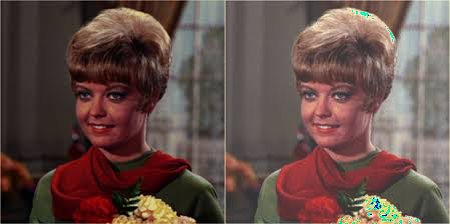

In [7]:
import cv2 as cv

print(' Mengubah tingkat kecerahan citra ')
print('------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.jpeg')
brightness_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)



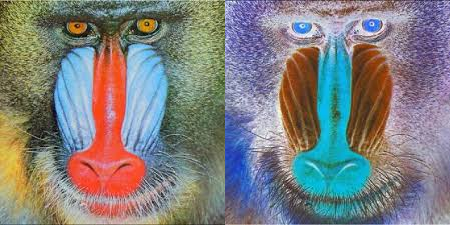

In [8]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

original = cv.imread('/content/drive/MyDrive/PCVK/monkey.jpeg')
inverse_img = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            inverse_img[y, x, c] = 255 - original[y, x, c]

final_frame = cv.hconcat([original, inverse_img])
cv2_imshow(final_frame)


 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 120
Masukkan kontras [1.0 - 3.0]: 1.5


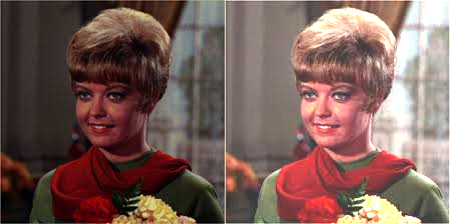

In [18]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')
try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
except ValueError:
    print('Error, not a number')
    brightness = 0

try:
    contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
    print('Error, not a number')
    contrast = 1.0

# Baca gambar dan konversi ke float32 biar tidak overflow
original = cv.imread('/content/drive/MyDrive/PCVK/female.jpeg').astype(np.float32)
contrast_img = np.zeros(original.shape, dtype=np.float32)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            new_val = contrast * (original[y, x, c] - 128) + 128 + brightness
            contrast_img[y, x, c] = new_val

# Clip ke [0,255] dan ubah balik ke uint8
contrast_img = np.clip(contrast_img, 0, 255).astype(np.uint8)
original = original.astype(np.uint8)

# Gabungkan hasil
final_frame = cv.hconcat((original, contrast_img))
cv2_imshow(final_frame)


 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan (konstanta log): 40


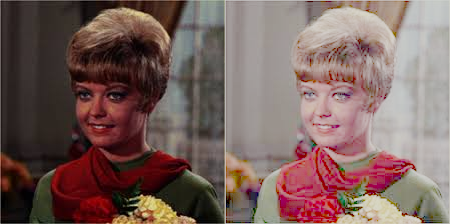

In [14]:
import cv2 as cv
import numpy as np
import math
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')
try:
    c = int(input('Masukkan nilai kecerahan (konstanta log): '))
except ValueError:
    print('Error, not a number')
    c = 1

original = cv.imread('/content/drive/MyDrive/PCVK/female.jpeg')
log_img = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for ch in range(original.shape[2]):
            r = int(original[y, x, ch])
            s = c * math.log(1 + r)
            log_img[y, x, ch] = np.clip(s, 0, 255)

final_frame = cv.hconcat((original, log_img))
cv2_imshow(final_frame)


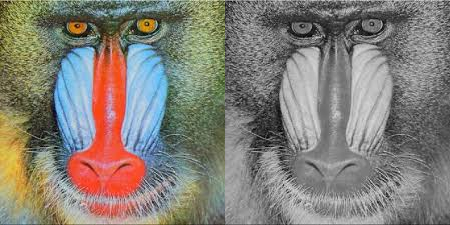

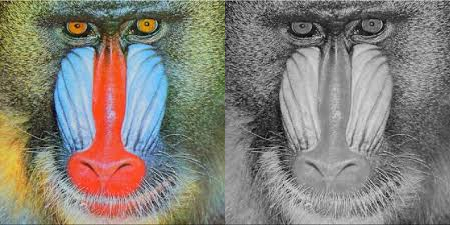

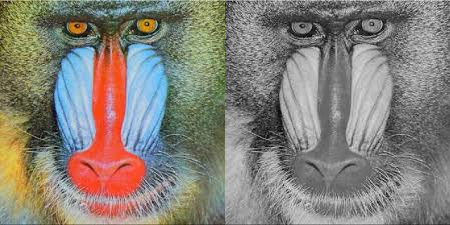

In [21]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Baca gambar
original = cv.imread('/content/drive/MyDrive/PCVK/monkey.jpeg')
img = original.astype(np.int32)

# Siapkan canvas kosong
gray_avg = np.zeros_like(original)
gray_light = np.zeros_like(original)
gray_lum = np.zeros_like(original)

# Loop pixel
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        R = img[y, x, 2]
        G = img[y, x, 1]
        B = img[y, x, 0]

        # Averaging
        avg = (R + G + B) // 3
        gray_avg[y, x] = (avg, avg, avg)

        # Lightness
        light = (max(R, G, B) + min(R, G, B)) // 2
        gray_light[y, x] = (light, light, light)

        # Luminance
        lum = int(0.21*R + 0.72*G + 0.07*B)
        gray_lum[y, x] = (lum, lum, lum)

# Pastikan range aman
gray_avg = np.clip(gray_avg, 0, 255).astype(np.uint8)
gray_light = np.clip(gray_light, 0, 255).astype(np.uint8)
gray_lum = np.clip(gray_lum, 0, 255).astype(np.uint8)

# --- Tampilkan satu per satu ---
# Averaging
final_avg = cv.hconcat((original, gray_avg))
cv2_imshow(final_avg)

# Lightness
final_light = cv.hconcat((original, gray_light))
cv2_imshow(final_light)

# Luminance
final_lum = cv.hconcat((original, gray_lum))
cv2_imshow(final_lum)


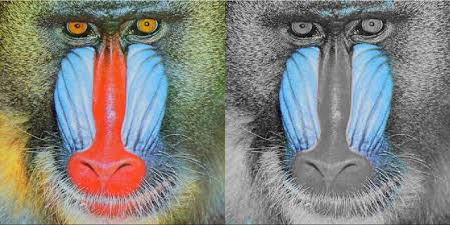

In [22]:
original = cv.imread('/content/drive/MyDrive/PCVK/monkey.jpeg')

# Konversi ke grayscale
gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
gray_rgb = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

# Pisahkan channel
B, G, R = cv.split(original)

custom_img = gray_rgb.copy()

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        if B[y, x] > G[y, x] and B[y, x] > R[y, x]:
            custom_img[y, x] = (B[y, x], G[y, x], R[y, x])  # keep original

final_frame = cv.hconcat([original, custom_img])
cv2_imshow(final_frame)
